<a href="https://colab.research.google.com/github/Sanarazaaa/Deep-Learning-Classification-of-Parkinson-s-Dataset-with-SHAP-Interpretability/blob/main/Deep_Learning_Classification_of_Parkinson%E2%80%99s_Dataset_with_SHAP_Interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving parkinsons_data.csv to parkinsons_data (6).csv
Feature shape: (1199, 4506)
Target shape: (1199,)
Target unique values: [0 1 2 3 4]
Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6686 - loss: 1.3450 - val_accuracy: 0.8281 - val_loss: 0.6020
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8495 - loss: 0.4713 - val_accuracy: 0.9219 - val_loss: 0.2509
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9231 - loss: 0.2123 - val_accuracy: 0.9219 - val_loss: 0.1821
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9471 - loss: 0.1839 - val_accuracy: 0.9375 - val_loss: 0.1565
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9639 - loss: 0.1289 - val_accuracy: 0.9375 - val_loss: 0.1397
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9952 - loss: 0.1079 - val_accuracy: 0.9375 - val_loss: 0.1254
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9987 - loss: 0.0558 - val_accuracy: 0

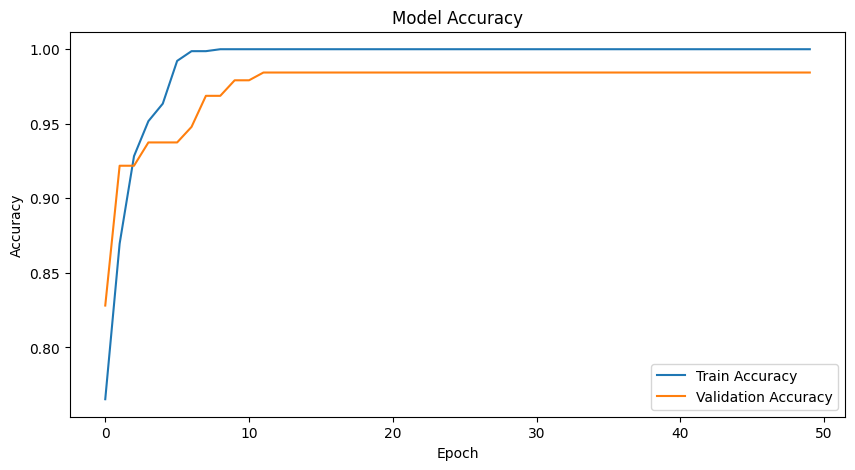

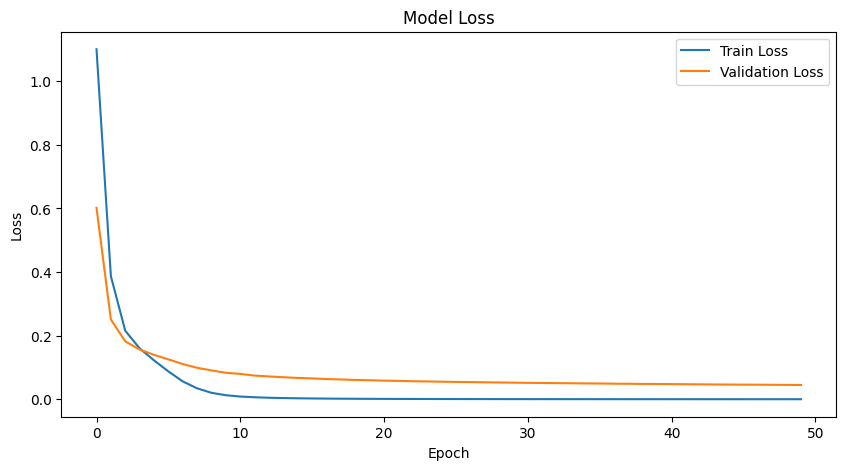

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9724 - loss: 0.0793  
Test Loss: 0.0679, Test Accuracy: 0.9750
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Confusion Matrix:
 [[184   0   0   0   0]
 [  0  20   1   0   1]
 [  0   1   5   0   0]
 [  0   1   2   5   0]
 [  0   0   0   0  20]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       0.91      0.91      0.91        22
           2       0.62      0.83      0.71         6
           3       1.00      0.62      0.77         8
           4       0.95      1.00      0.98        20

    accuracy                           0.97       240
   macro avg       0.90      0.87      0.87       240
weighted avg       0.98      0.97      0.97       240

First 10 Predictions: [0 0 0 1 1 0 0 0 1 0]
First 10 True labels: [0 0 0 1 1 0 0 0 1 0]


In [4]:
# Install TensorFlow if needed
# !pip install tensorflow

from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Upload CSV
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Step 2: Load CSV
data = pd.read_csv(file_name)

# Step 3: Drop empty columns
data = data.drop(columns=[col for col in data.columns if data[col].isnull().sum() == len(data)])

# Step 4: Select target column (multi-class)
target_col = 'Replication'  # replace with your target column if different
y = data[target_col]

# Encode target if categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Step 5: Select features
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

X_cat = pd.get_dummies(data[categorical_cols])       # One-hot encode categorical
X_num = data.select_dtypes(include=['int64', 'float64'])  # Numeric columns

# Combine numeric and one-hot encoded features
X_processed = pd.concat([X_num, X_cat], axis=1)

# Store feature names before converting to numpy array
feature_names = X_processed.columns.tolist()

X = X_processed.values

# Ensure numeric type
X = X.astype('float32')
y = y.astype('int')

# Check shapes
print("Feature shape:", X.shape)
print("Target shape:", y.shape)
print("Target unique values:", np.unique(y))

# Step 6: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build multi-class neural network
model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))  # number of classes

# Step 8: Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 9: Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Step 10: Plot training & validation accuracy/loss
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 11: Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Step 12: Predict on test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)  # get class with highest probability

# Step 13: Confusion matrix & classification report
cm = confusion_matrix(y_test, predicted_classes)
cr = classification_report(y_test, predicted_classes)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

# Step 14: Optional - first 10 predictions vs true labels
print("First 10 Predictions:", predicted_classes[:10])
print("First 10 True labels:", y_test[:10])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


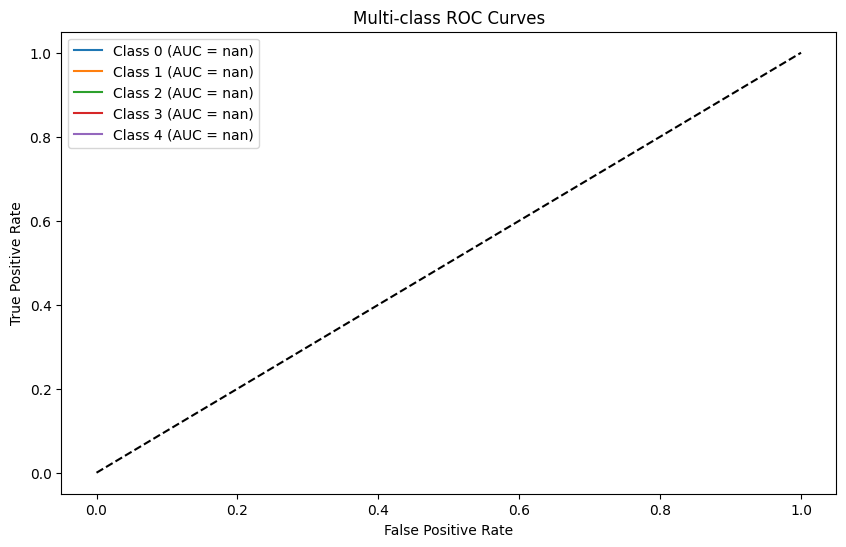

In [11]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))
pred_prob = model.predict(X_test)

plt.figure(figsize=(10,6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr,tpr):.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves')
plt.legend()
plt.show()


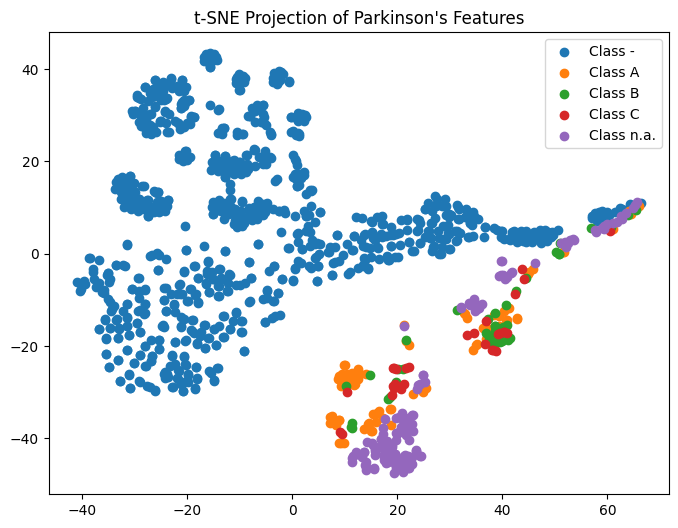

In [12]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X)
plt.figure(figsize=(8,6))
for class_val in np.unique(y):
    idx = np.where(y==class_val)
    plt.scatter(X_embedded[idx,0], X_embedded[idx,1], label=f'Class {class_val}')
plt.legend()
plt.title('t-SNE Projection of Parkinson\'s Features')
plt.show()


N studies: 0.0097
P-value: 0.0612
Genetic locus_A2M: 0.0000
Genetic locus_ABCA3: 0.0006
Genetic locus_ABCA5: 0.0000
Genetic locus_ABCB1: 0.0000
Genetic locus_ACACA: 0.0000
Genetic locus_ACE: 0.0000
Genetic locus_ACMSD/TMEM163: 0.0016
Genetic locus_ACMSD/TMEM163 : 0.0003
Genetic locus_ACOT11: 0.0000
Genetic locus_ADAL/TUBGCP4: 0.0000
Genetic locus_ADAMTS16: 0.0000
Genetic locus_ADCYAP1R1: 0.0000
Genetic locus_ADH1C: 0.0000
Genetic locus_ADORA2A: 0.0004
Genetic locus_AGBL4: 0.0000
Genetic locus_AGPHD1: 0.0000
Genetic locus_AK095618: 0.0000
Genetic locus_ANKK1: 0.0001
Genetic locus_AP3B1: 0.0002
Genetic locus_APOB: 0.0000
Genetic locus_APOE: 0.0006
Genetic locus_ARNT: 0.0000
Genetic locus_ATHL1: 0.0000
Genetic locus_ATP13A2: 0.0000
Genetic locus_B2M: 0.0000
Genetic locus_BCHE: 0.0000
Genetic locus_BCL2: 0.0000
Genetic locus_BDNF: 0.0000
Genetic locus_BST1: 0.0027
Genetic locus_C10orf32: 0.0014
Genetic locus_C11orf74: 0.0000
Genetic locus_C15orf60: 0.0000
Genetic locus_C1orf175: 0.0000
Gen

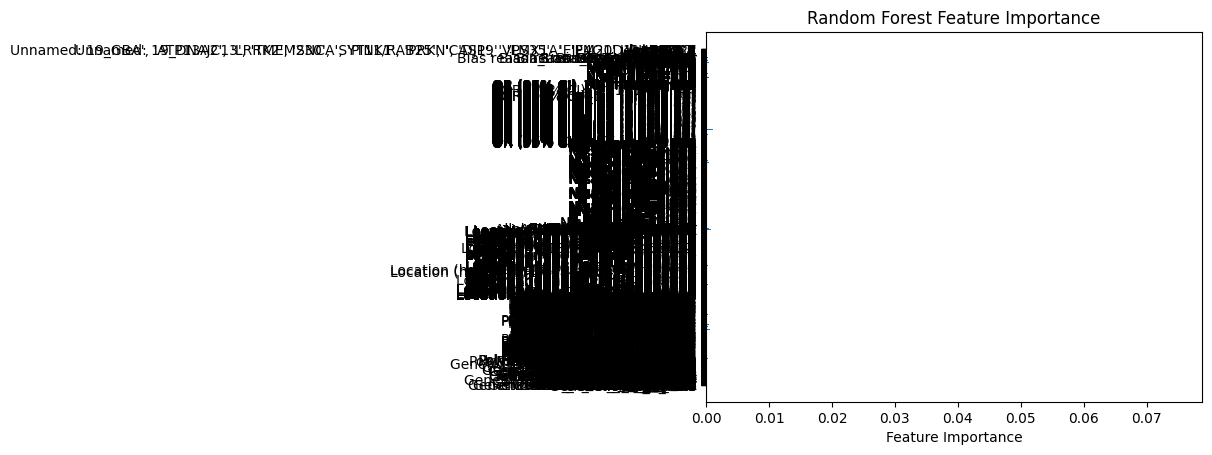

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
for i, v in enumerate(importances):
    print(f"{feature_names[i]}: {v:.4f}")

# Optional: plot
import matplotlib.pyplot as plt
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4157/4157 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
4154/4154 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4157/4157 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
4160/4160 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
4163/4163 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4157/4157 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4157/4157 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
4157/4157 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
4163/4163 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4160/4160 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4157/4157 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4163/4163 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
1/1 ━━━━━━━━━━━━

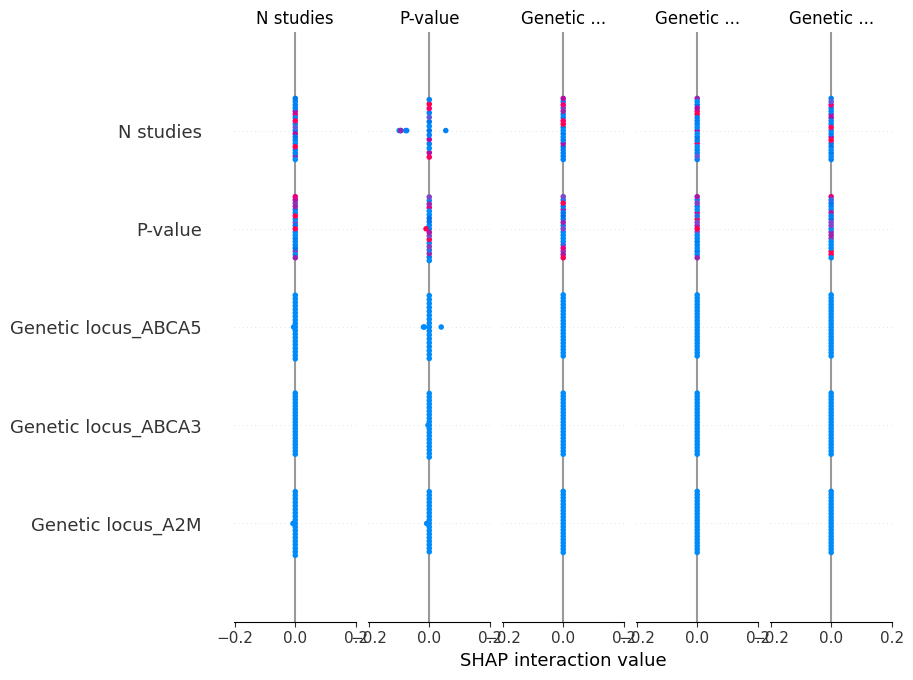

In [15]:
import shap

explainer = shap.KernelExplainer(model.predict, X_train[:50])  # smaller sample for speed
shap_values = explainer.shap_values(X_test[:20])

shap.summary_plot(shap_values, X_test[:20], feature_names=feature_names)


In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stop])


Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 8.6477e-05 - val_accuracy: 0.9792 - val_loss: 0.0479
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 1.7834e-04 - val_accuracy: 0.9792 - val_loss: 0.0451
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 4.7871e-05 - val_accuracy: 0.9792 - val_loss: 0.0447
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 8.4070e-05 - val_accuracy: 0.9792 - val_loss: 0.0432
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 5.4854e-05 - val_accuracy: 0.9792 - val_loss: 0.0422
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 4.7213e-05 - val_accuracy: 0.9792 - val_loss: 0.0408
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9844 - val_loss: 0.0446
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 8

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve

# After one-hot encoding your labels
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_bin = model.predict(X_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
